In [1]:
import lightgbm as lgbm

import pandas as pd
import numpy as np

import sys, os

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
import matplotlib.pyplot as plt

def confusion(true,pred):
    confusion_matrix = ConfusionMatrix(true, pred)
    confusion_matrix.plot()
    plt.set_cmap('Greens')
    plt.rcParams.update({'font.size': 12})
    return plt.show()

### Import Data

In [13]:
df = pd.read_csv('features_clean_reduced.csv').iloc[:, 1:]

### Train Test Val Splits

In [14]:
X_train = df.iloc[:, 1:-1]
y_train = df.iloc[:, -1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

### LGBM Model

In [16]:
rf = RandomForestClassifier()

In [17]:
params = {
    'n_estimators' : [5, 50, 100, 200, 500],
    'max_depth' : [5, 10, 15, 20, 25],
    'min_samples_leaf' : [10, 30, 50, 100],
}

In [18]:
gcv = GridSearchCV(rf, params, verbose=2)

In [19]:
gcv.fit(X_train, y_train)

C:\Users\Zach\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] max_depth=5, min_samples_leaf=10, n_estimators=5 ................
[CV] . max_depth=5, min_samples_leaf=10, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, n_estimators=5 ................
[CV] . max_depth=5, min_samples_leaf=10, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, n_estimators=5 ................
[CV] . max_depth=5, min_samples_leaf=10, n_estimators=5, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_leaf=10, n_estimators=50, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_leaf=10, n_estimators=50, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, n_estimators=50 ...............
[CV]  max_depth=5, min_samples_leaf=10, n_estimators=50, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, n_estimators=100 ..............
[CV]  max_dept

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 50, 100, 200, 500], 'max_depth': [5, 10, 15, 20, 25], 'min_samples_leaf': [10, 30, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [20]:
gcv.best_params_

{'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 100}

In [21]:
gcv.best_score_

0.8655336911150865

In [22]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=200)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_pred, y_test)

0.8682197496522949

### Export Tree

### Feature Importances

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [10]:
X_train.columns

Index(['SpeedPct', 'MaxSpeed', 'STDSpeed', 'MeanSpeed', 'DuplcateLL',
       'isWeekend', 'PTClosed', 'AccelPct', 'MaxAccel', 'STDAccel',
       'MeanAccel', 'TotalDistance', 'Bixies_bixie', 'Bixies_no_bixie',
       'RushType_MR', 'RushType_NR', 'RushType_S', 'City_d', 'City_e',
       'City_n', 'City_v', 'City_w'],
      dtype='object')

C:\Users\Zach\Anaconda3\envs\tf\lib\site-packages\pandas_ml\confusion_matrix\abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


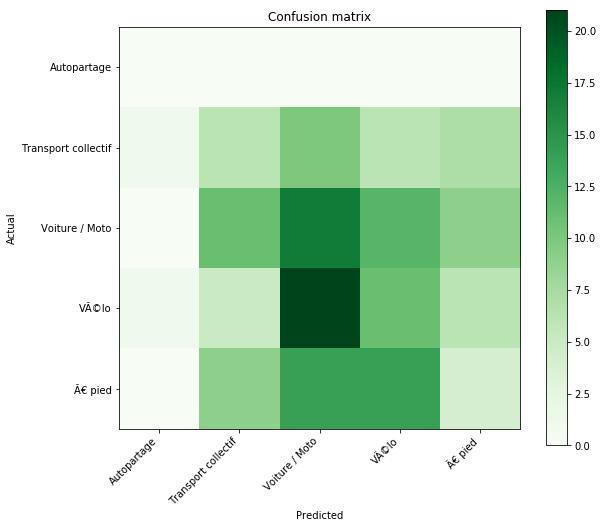

In [11]:
confusion(y_pred, y_test)